<hr/>

<h1> Problem 2: Network of discrete elements <h1/>
     
<h4> Gabriel de Almeida Miki </h4>

<hr>

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>Problema proposto:</h3>
</div>

<img src = 'img1.png'>

<hr>

In [1]:
%matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
import seaborn as sn
import numpy as np
import random
import pandas as pd

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>Funções responsáveis pela elaboração do Grafo de N1 x N2 nós:</h3>
</div>

In [2]:
def fazGrafo(N1, N2):
    menor = np.min([N1, N2])
    maior = np.max([N1, N2])
    y_in = np.arange(0, maior)
    
    y_fim = []
    x = []
    
    plt.figure(figsize = (20, 10))
    
    if N1 >= N2:
        for i in range(menor):
            x = np.hstack((x, np.ones(N1) * i))
    
        for i in range(menor):
            y_fim = np.hstack((y_fim, y_in))
            
        grafoText(N1, N2, y_fim)
        grafoFazLinhas1(maior, menor, x, y_fim)
        
    else:
        for i in range(menor):
            x = np.hstack((x, y_in))
    
        for i in range(menor):
            y_fim = np.hstack((y_fim, np.ones(maior) * i))
            
        grafoText(N1, N2, x)
        grafoFazLinhas2(maior, menor, y_fim, x)
         
    plt.gca().spines[['bottom', 'top', 'right', 'left']].set_visible(False)
    
    plt.gca().set_yticklabels([])
    plt.gca().set_yticks([])
    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    
    plt.scatter(x, y_fim, s = 400, c = 'black', marker = 'o')

In [3]:
def grafoText(N1, N2, itera):
    nos = 0
    
    for locText_y in itera[:N1]:
        for locText_x in itera[:N2]:
            nos += 1
            
            plt.text(locText_x - 0.15, locText_y - 0.35, str(nos),
                     size = 12, bbox=dict(boxstyle="round",
                                          ec=(0.2, 0.2, 0.2),
                                          fc=(1.0, 1.0, 1.0),
                                          )
                    )            

In [4]:
def grafoFazLinhas1(maior, menor, cstt, itera):
    
    for i in range(maior):
        
        plt.plot(itera[:menor], np.ones(menor) * i, color = 'black', linewidth = 4, alpha = 0.5)
        
    for i in range(menor):
        
        plt.plot(cstt[i * maior:(i + 1) * maior], itera[:maior], color = 'black', linewidth = 4, alpha = 0.5)

In [5]:
def grafoFazLinhas2(maior, menor, cstt, itera):
    
    for i in range(maior):
        
        plt.plot(np.ones(menor) * i, itera[:menor], color = 'black', linewidth = 4, alpha = 0.5)
        
    for i in range(menor):
        
        plt.plot(itera[:maior], cstt[i * maior:(i + 1) * maior], color = 'black', linewidth = 4, alpha = 0.5)

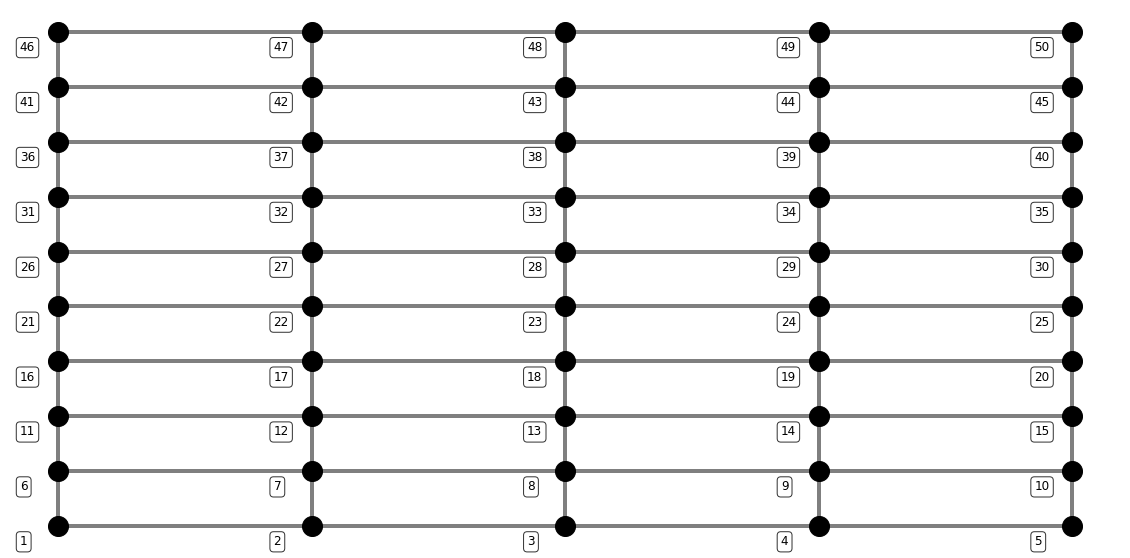

In [6]:
fazGrafo(10, 5)

<hr>

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>Função formadora da matriz de inicdência <u>J</u> (matriz que representa as arestas em termos dos nós):</h3>
</div>

In [7]:
def geraMatrizIncidencia(N1, N2):
    tot_arestas = (N1 * (N2 - 1)) + (N2 * (N1 - 1))
    tot_nos = N1 * N2
    mat_inc = np.zeros((tot_arestas, tot_nos))
    
    add = 0
    
    for i in range(tot_arestas):
        if i != 0 and i % (N2 - 1) == 0:
            add += 1
            
        if i + add >= tot_nos:
            break

        mat_inc[i, i + add] = 1
        mat_inc[i, i + add + 1] = -1
       
    nos = 0
    
    for i in range((N1 * (N2 - 1)), tot_arestas):
        
        mat_inc[i, nos] = 1
        mat_inc[i, nos + N2] = -1
        
        nos += 1
        
    return mat_inc

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3><u> Nela tem-se: </u> </h3>
<table border = "1px">

<tr align="center"> 
    <th> &nbsp; </th> <th> Nó 1 </th> <th> Nó 2 </th> <th> ... </th> <th> Nó N2 </th> <th> Nó N2 + 1 </th> <th> Nó N2 + 2 </th> <th> ... </th> <th> Nó N - N2 </th> <th> ... </th> <th> Nó N </th>
</tr>
        
<tr align="center"> 
<th> Aresta 1 </th> <td> 1 </td> <td> -1 </td> <td> ... </td> <td> 0 </td> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> ... </td> <td> 0 </td>
</tr>
        
<tr align="center"> 
<th> Aresta 2 </th> <td> 0 </td> <td> 1 </td> <td> ... </td> <td> 0 </td> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> ... </td> <td> 0 </td>
</tr>
    
<tr align="center">
<th> ... </th> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> ... </td> <td> 0 </td>
</tr>

<tr align="center"> 
<th> Aresta N2 </th> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> 1 </td> <td> -1 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> ... </td> <td> 0 </td>
</tr>
    
<tr align="center"> 
<th> Aresta N2 + 1 </th> <td> 0 </td> <td> 1 </td> <td> ... </td> <td> 0 </td> <td> 0 </td> <td> 1 </td> <td> ... </td> <td> 0 </td> <td> ... </td> <td> 0 </td>
</tr>
    
<tr align="center">
<th> ... </th> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> ... </td> <td> 0 </td>
</tr> 
    
<tr align="center"> 
<th> Aresta (N1 * (N2 - 1)) + 1 </th> <td> 1 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> -1 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> ... </td> <td> 0 </td>
</tr>
    
<tr align="center"> 
<th> Aresta (N1 * (N2 - 1)) + 2 </th> <td> 0 </td> <td> 1 </td> <td> ... </td> <td> 0 </td> <td> 0 </td> <td> -1 </td> <td> ... </td> <td> 0 </td> <td> ... </td> <td> 0 </td>
</tr>
    
<tr align="center">
<th> ... </th> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> ... </td> <td> 0 </td>
</tr> 
        
<tr align="center"> 
<th> Aresta M </th> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> 1 </td> <td> ... </td> <td> -1 </td>
</tr> 
        
</table>
<br>
<p>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp <u> Em que: </u> <br>
  <b> N = N1 * N2 <br>
      M = N1 * (N2 - 1) + N2 * (N1 - 1)</b>
</p>
<p> 
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp Como é possível observar, a matriz de inicdênca para o problema de uma malha hidráulica segue um padrão inicial no qual o nó que inicia a aresta é igual a $Aresta + (Cada Vez que se Passa por um Multiplo de (N2 - 1))$ até atingir um total de $N1 * (N2 - 1)$. A aresta seguinte passa a ter seu início no nó um e término no nó $1 + N2$, tal padrão repete-se para os valores da progressão aritimética de razão um até a última aresta. 
</p>
</div>

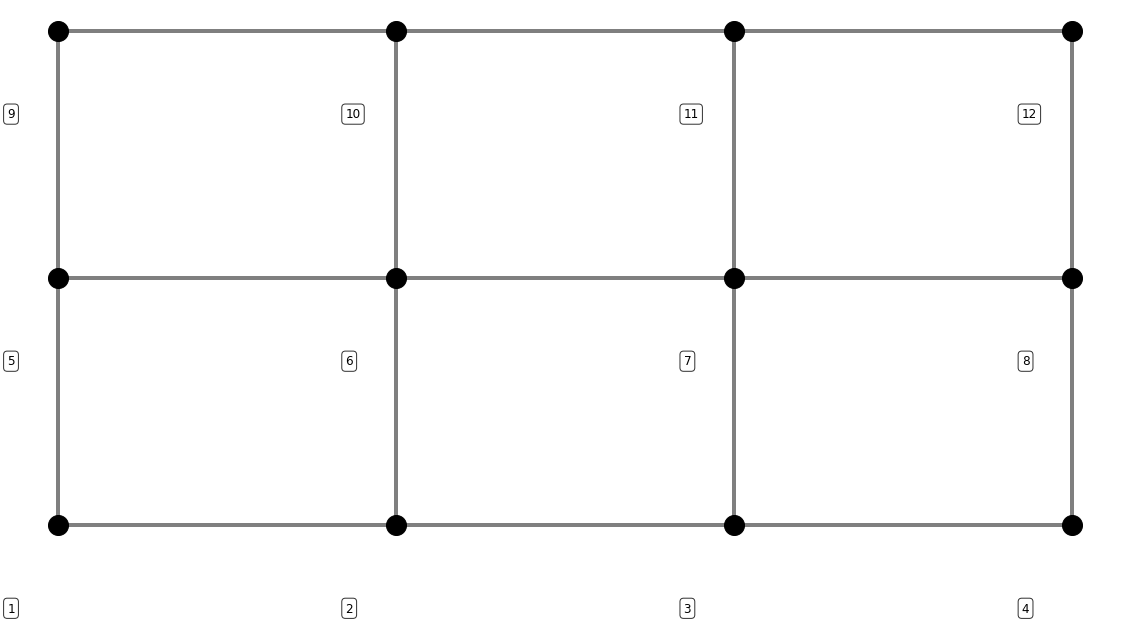

In [8]:
fazGrafo(3, 4)

<hr>

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>Função formadora da matriz de diagonal <u>R</u> (matriz que contem as resistencias de cada aresta (cano)):</h3>
</div>

In [9]:
def geraMatrizDiagonal(N1, N2):
    tot_arestas = (N1 * (N2 - 1)) + (N2 * (N1 - 1))
    mat_dia = np.zeros((tot_arestas, tot_arestas))

    for linha in range(tot_arestas):
        for coluna in range(tot_arestas):
            if linha == coluna:
                mat_dia[linha, coluna] = 1
  
    return mat_dia

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3><u> Nela tem-se: </u> </h3>
<table border = "1px">

<tr align="center"> 
    <th> &nbsp; </th> <th> Aresta 1 </th> <th> Aresta 2 </th> <th> ... </th> <th> Aresta M - 1 </th> <th> Aresta M </th>
</tr>
        
<tr align="center"> 
<th> Aresta 1 </th> <td> $R_{1}$ </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> 0 </td>
</tr>
  
<tr align="center"> 
<th> Aresta 2 </th> <td> 0 </td> <td> $R_{2}$ </td> <td> ... </td> <td> 0 </td> <td> 0 </td>
</tr>
    
<tr align="center"> 
<th> ... </th> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> 0 </td>
</tr>
    
<tr align="center"> 
<th> Aresta M - 1 </th> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> $R_{M - 1}$ </td> <td> 0 </td>
</tr>
    
<tr align="center"> 
<th> Aresta M </th> <td> 0 </td> <td> 0 </td> <td> ... </td> <td> 0 </td> <td> $R_{M}$ </td>
</tr>
    
</table>
<br>
<p>&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp <u> Em que: </u> <br>
  <b> M = N1 * (N2 - 1) + N2 * (N1 - 1)</b>
</p>
<p> 
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp É válido destacar que os valores das resistências podem variar entre $1$ e $\frac{1}{16}$, uma vez que o problema estipula os valores para $\frac{8 \mu l}{\pi}$ e $a$ como sendo um e o raio podendo ter entre uma e duas unidades.
</p>
</div>

<hr>

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>Função formadora da matriz final:</h3>
</div>

In [10]:
def geraMatrizTotal(incidencia, diagonal, N1, N2):
    tot_nos = N1 * N2
    mat_zero = np.zeros((tot_nos, tot_nos))
    mat_zero[0, 0] = 1
    
    incidencia_trasposta = incidencia.T
    incidencia_trasposta[0, :] = 0
    
    mat_fim = np.vstack((np.hstack((diagonal, -incidencia)), np.hstack((incidencia_trasposta, mat_zero))))
    
    return mat_fim

In [11]:
def resolveProblema(N1, N2, mat_dia):
    tot_arestas = (N1 * (N2 - 1)) + (N2 * (N1 - 1))
    tot_nos = N1 * N2
    
    B = geraMatrizTotal(geraMatrizIncidencia(N1, N2), mat_dia, N1, N2)
    
    q_result = np.ones((tot_nos, 1)) * -1
    q_result[0, 0] = 0
    
    f_result = np.zeros((tot_arestas, 1))
    
    d = np.vstack((f_result, q_result))  
    
    f_q = np.linalg.solve(B, d)
    
    f = f_q[:tot_arestas]
    q = f_q[tot_arestas:tot_arestas + tot_nos]
    
    return f, q              
    

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3><u> Nela tem-se: </u> </h3>
<table border = "1px">

<tr> 
    <th> $R_{MxM}$ </th> <th> $-J_{MxN}$ </th> <td rowspan="4">$x$</td> <th>$f_{Mx1}$ </th> <td rowspan='2'>$=$</td> <th> $Z_{Mx1}$ </th>
</tr>
        
<tr> 
    <th> $J^{T}_{NxM}$ </th> <th> $Z_{NxN}$ </th> <th> $q_{Nx1}$ </th> <th> $-Ones_{Nx1}$ </th>
</tr>
        
</table>
<br>
<p> &nbsp&nbsp&nbsp&nbsp&nbsp&nbsp <u> Em que: </u> <br>
  <b> N = N1 * N2 <br>
      M = N1 * (N2 - 1) + N2 * (N1 - 1)</b>
</p>
<p> 
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp A parte superior está relacionada com a teoria de Hagen-Poiseuille e envolve a muitiplicação das resistencias nos 'canos' com as variáveis de fluxo $f$ (vazão no caso da malha hidraulica) e a distribuição de pressões $q$:
    <br><br>
    $$
    \Delta p = \frac{8 \mu l}{\pi r^4} Q
    $$
    <br>
Ao final da multiplicação matricial tem-se as seguintes equações:<br><br>
    $$
    (f_{1} * R_{1})  + (q_{2} - q_{1}) = 0
    $$
    $$
    (f_{2} * R_{2}) + (q_{3} - q_{2}) = 0
    $$
    $$
    ...
    $$
    $$
    (R_{M} * f_{M}) + (q_{N - N2} - q_{N}) = 0
    $$
<br>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp Nelas verificam-se os fatores da fórmula de Hagen-Poiseuille, com a diferença de que a variação de pressão encontra-se no outro lado daequação e com sinais trocados.<br>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp Já a parcela inferior está ligada a conservação do fluxo de matéria por entre os nós:<br><br>
    $$
    (J^{T}_{NxM} * f_{Mx1}) + (Z_{NxN} * q_{Nx1}) = -Ones_{Nx1}
    $$
    <br>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp Na equação formada a matriz de incidêcia transposta corresponde ao mapeamento de arestas que chegam ou saem de cada nó que, em conjunto com o fluxo, determina a entrada e saída de matéria. E a segunda parcela da euqação busca inserir no equacionamento possíveis entradas ou saídas de pressão vindas ou direcionadas para fora do sistema.<br>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp Nesse contexto, destaca-se que a linha $M + 1$ da 'primeira coluna' da matrix total(primeira linha da matriz $J^{T}$) encontra-se inteiramente zerada, o mesmo foi feito para a mesma linha da matriz resultado, ao mesmo tempo que o valor de $Z_{0x0}$ foi alterado para um. Tais mudanças foram feitas devido ao nó um ser responsável pelo abastecimento do sistema e portanto não possui outra entrada que não a exterior. Como esse é o único ponto em que o sistema interage com o exterior não se observa outro procedimento do mesmo gênero.
</p>

</div>

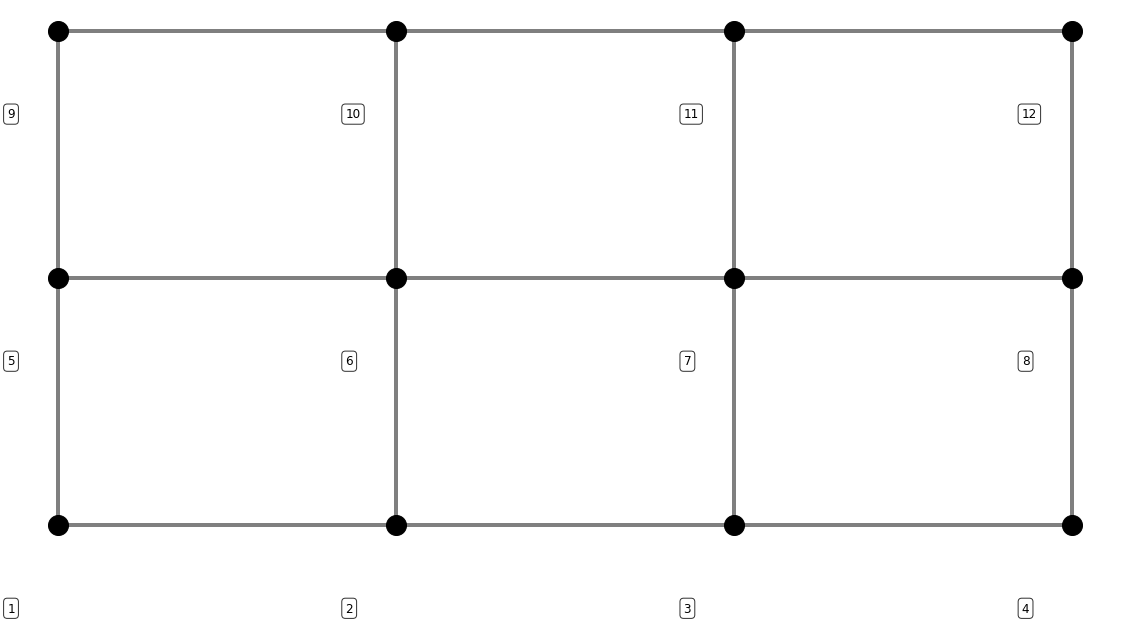

In [12]:
fazGrafo(3, 4)

<AxesSubplot:>

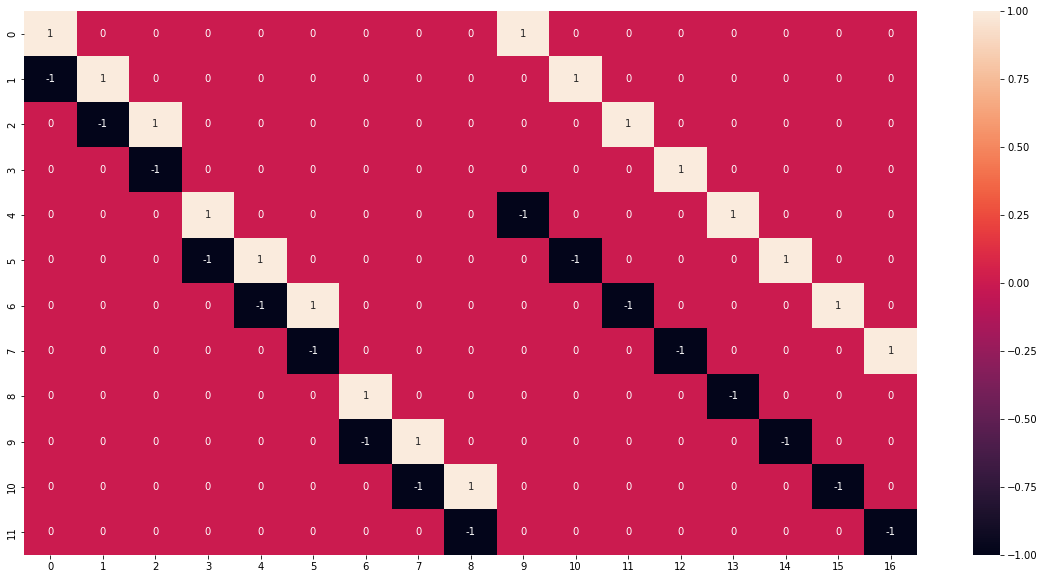

In [13]:
plt.figure(figsize = (20, 10))
sn.heatmap(geraMatrizIncidencia(3, 4).T, annot = True)

<hr>

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>A abordagem:</h3>
    
<p>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp A abordagem escolhida baseia-se na fórmula de Hagen-Poiseuille, na qual pode-se observar que a variação da pressão é diretamente proporcional ao fluxo, fator decisivo uma vez que o objetivo do problema reside em diminuir a variação da pressão do sistema.<br>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp Dessa forma, a redução máxima na variação da pressão seria obtida com uma também redução máxima no fluxo. E visto que a mudaça no valor total da variaçao da pressao ocorrerá na forma de subtração de $\frac{8 \mu l Q 15}{\pi 16}$ e que a única variável que se altera de nó para nó é o fluxo, escolheu-se os fluxos de maior valor visando maiores reduções na variação total da pressão.
</p>
</div>

In [14]:
def alteraDiagonal(mat_dia, loc_resist):
    
    mat_dia[loc_resist, loc_resist] = (1 / 16)
    
    return mat_dia

<AxesSubplot:>

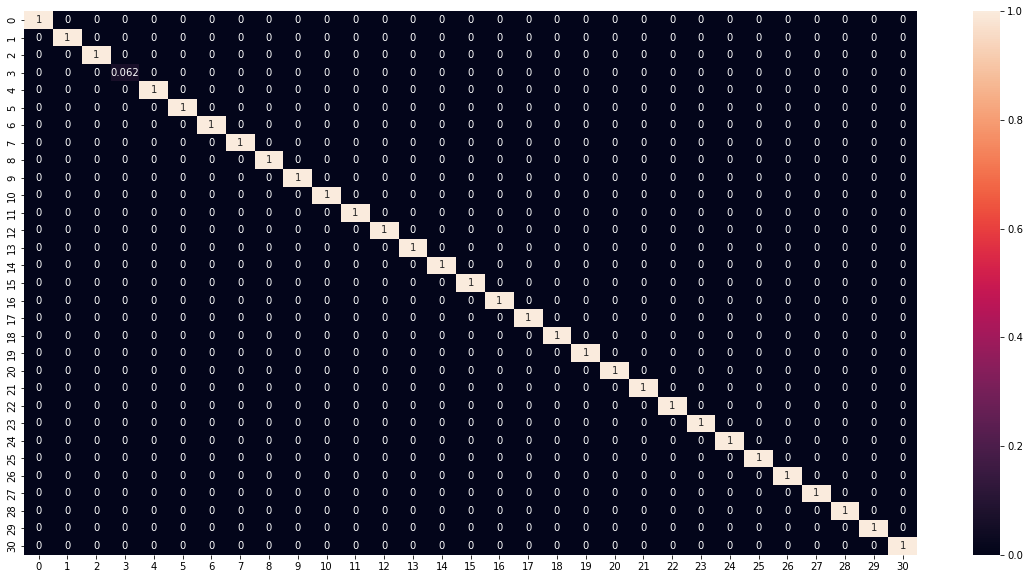

In [15]:
plt.figure(figsize = (20, 10))
sn.heatmap(alteraDiagonal(geraMatrizDiagonal(4, 5), 3), annot = True)

In [83]:
def encontraMaxF(N1, N2, maior, x_maiores):
    arestas = list()
    cont = 0
    
    for i in range(maior, maior + x_maiores):
        if cont == 0:
            f, q = resolveProblema(N1, N2, geraMatrizDiagonal(N1, N2))
        
        else: 
            f, q = resolveProblema(N1, N2, new_dia)
    
        f_df = pd.DataFrame(f, columns = ['fluxo'])
        q_df = pd.DataFrame(q, columns = ['pressao'])
    
        f_descending = f_df.sort_values('fluxo', ascending = False)
        f_descending.reset_index(inplace = True)
        
        index_maior = f_descending['index'].iloc[i]
        arestas.append(index_maior)
#        print("O ", maior, "th maior é a aresta: ", index_maior, "\n")
        
        if cont == 0:
            new_dia = alteraDiagonal(geraMatrizDiagonal(N1, N2), index_maior)
        
        else: 
            new_dia = alteraDiagonal(new_dia, index_maior)
            
        cont += 1
    
    return new_dia, arestas

In [28]:
def grafoText2(ax, N1, N2, itera, q):
        nos = 0
        add = 0
        
        for locText_y in itera[:N1]:
            for locText_x in itera[:N2]:
                nos += 1
            
                ax.text(locText_x, locText_y - 0.18, -35, "Nó " + str(nos) + ": \n" + str(round(float(q[nos - 1]), 2)),
                        size = 8, bbox=dict(boxstyle="round",
                                    ec=(0.2, 0.2, 0.2),
                                    fc=(1.0, 1.0, 1.0),
                                             )
                        )
            add += 8

In [29]:
def grafoFazLinhas3D1(ax, maior, menor, cstt, itera):
    
    for i in range(maior):
        
        ax.plot(itera[:menor], np.ones(menor) * i, zs = -30, zdir = 'z',color = 'black', linewidth = 4, alpha = 0.5)
        
    for i in range(menor):
        
        ax.plot(cstt[i * maior:(i + 1) * maior], itera[:maior], zs = -30, zdir = 'z', color = 'black', linewidth = 4, alpha = 0.5)

In [30]:
def grafoFazLinhas3D2(ax, maior, menor, cstt, itera):
    
    for i in range(maior):
        
        ax.plot(np.ones(menor) * i, itera[:menor], zs = -30, zdir = 'z', color = 'black', linewidth = 4, alpha = 0.5)
        
    for i in range(menor):
        
        ax.plot(itera[:maior], cstt[i * maior:(i + 1) * maior], zs = -30, zdir = 'z', color = 'black', linewidth = 4, alpha = 0.5)

In [31]:
def plot3DGrafo(ax, N1, N2, q):
    menor = np.min([N1, N2])
    maior = np.max([N1, N2])
    y_in = np.arange(0, maior)
    
    y_fim = []
    x = []
    
    if N1 >= N2:
        for i in range(menor):
            x = np.hstack((x, np.ones(N1) * i))
    
        for i in range(menor):
            y_fim = np.hstack((y_fim, y_in))
        
        grafoText2(ax, N1, N2, y_fim, q)
        grafoFazLinhas3D1(ax, maior, menor, x, y_fim)
        
    else:
        for i in range(menor):
            x = np.hstack((x, y_in))
    
        for i in range(menor):
            y_fim = np.hstack((y_fim, np.ones(maior) * i))
            
        grafoText2(ax, N1, N2, x, q)
        grafoFazLinhas3D2(ax, maior, menor, y_fim, x)
        
    ax.scatter(x, y_fim, -30, s = 400, c = 'black', marker = 'o')
    
    return x, y_fim

In [32]:
def plot3DBars(ax, x, y_fim, bottom, top):
    bars = ax.bar3d(x - 0.25, y_fim - 0.25, bottom, 0.5, 0.5, top, 
                    shade = True, alpha = 0.5)
    
    bars.set_edgecolor('black')
    bars.set_linewidth(3) 

In [33]:
def plot3DInicio(N1, N2, q_in, q_fim):
    fig = plt.figure(figsize=(50, 20))

    ax = fig.add_subplot(projection = "3d")
    
    ax.set_title('Distribuição de Pressões Iniciais', fontsize=18)
    ax.set_xlabel('N1', fontsize=15)
    ax.set_ylabel('N2', fontsize=15)

    x, y_fim = plot3DGrafo(ax, N1, N2, q_in)

    plot3DBars(ax, x, y_fim, np.zeros_like(q_in.ravel()), -q_in.ravel())

    ax.view_init(10, 150)
    
    plt.show()

In [34]:
def plot3DFim(N1, N2, q_in, q_fim):
    fig = plt.figure(figsize=(50, 20))

    ax = fig.add_subplot(projection = "3d")
    
    ax.set_title('Distribuição de Pressões Finais', fontsize=18)
    ax.set_xlabel('N1', fontsize=15)
    ax.set_ylabel('N2', fontsize=15)

    x, y_fim = plot3DGrafo(ax, N1, N2, q_fim)

    plot3DBars(ax, x, y_fim, np.zeros_like(q_fim.ravel()), -q_fim.ravel())

    ax.view_init(10, 150)
    
    plt.show()

In [35]:
def plot3DDiferenca(N1, N2, q_in, q_fim):
    fig = plt.figure(figsize=(50, 20))

    ax = fig.add_subplot(projection = "3d")
    
    ax.set_title('Diferenças das Distribuição de Pressões', fontsize=18)
    ax.set_xlabel('N1', fontsize=15)
    ax.set_ylabel('N2', fontsize=15)
    
    x, y_fim = plot3DGrafo(ax, N1, N2, q_in - q_fim)
    
    plot3DBars(ax, x, y_fim, np.zeros_like(q_fim.ravel()), -q_fim.ravel())
    plot3DBars(ax, x, y_fim, -q_fim.ravel(), -q_in.ravel())
    
    ax.view_init(8, 160)
    
    plt.show()

In [36]:
def plot3D(N1, N2, maior, x_maiores):
    _, q_in = resolveProblema(N1, N2, geraMatrizDiagonal(N1, N2))
    
    MaxF, _ = encontraMaxF(N1, N2, maior, x_maiores)
    _, q_fim = resolveProblema(N1, N2, MaxF)
    
    plot3DInicio(N1, N2, q_in, q_fim)
    
    plot3DFim(N1, N2, q_in, q_fim)
    
    plot3DDiferenca(N1, N2, q_in, q_fim)

In [93]:
def analiseFinalOrdenada(N1, N2, x_maiores):
    tot_arestas = (N1 * (N2 - 1)) + (N2 * (N1 - 1))
    tot_nos = N1 * N2
    
    q_fim_min = list()
    q_fim_min_index = list()
    arestas_subs = np.zeros((x_maiores))
    
    _, q_in = resolveProblema(N1, N2, geraMatrizDiagonal(N1, N2))
    
    for aresta in range(tot_arestas - x_maiores):
        MaxF, arestas = encontraMaxF(N1, N2, aresta, x_maiores)
        _, q_fim = resolveProblema(N1, N2, MaxF)
        
        arestas_subs = np.vstack((arestas_subs, arestas))
        
        q_fim_min_index.append("Do " + str(aresta + 1) + " ao " + str(aresta + x_maiores + 1) + " maiores") 
        q_fim_min.append(q_fim.min())
        
    df_q_fim_min = pd.DataFrame(data = q_fim_min, index = q_fim_min_index)
    
    plt.figure(figsize = (20, 10))
    
    plt.title("Mínima pressão quando substituídos " + str(x_maiores) + " canos com ordem de grandeza de vazão decrescentes.",
              fontsize = 18)
    plt.xlabel("Valores de vazão substituídos", fontsize = 15)
    plt.ylabel("Pressão Mínima", fontsize = 15)
    
    plot = plt.plot(df_q_fim_min, 'o-', color = 'lightgrey', linewidth = 3)
    
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        
    for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(60)
    
    plt.show()
    
    return arestas_subs

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>A abordagem com 10 canos substiuídos:</h3>
</div>

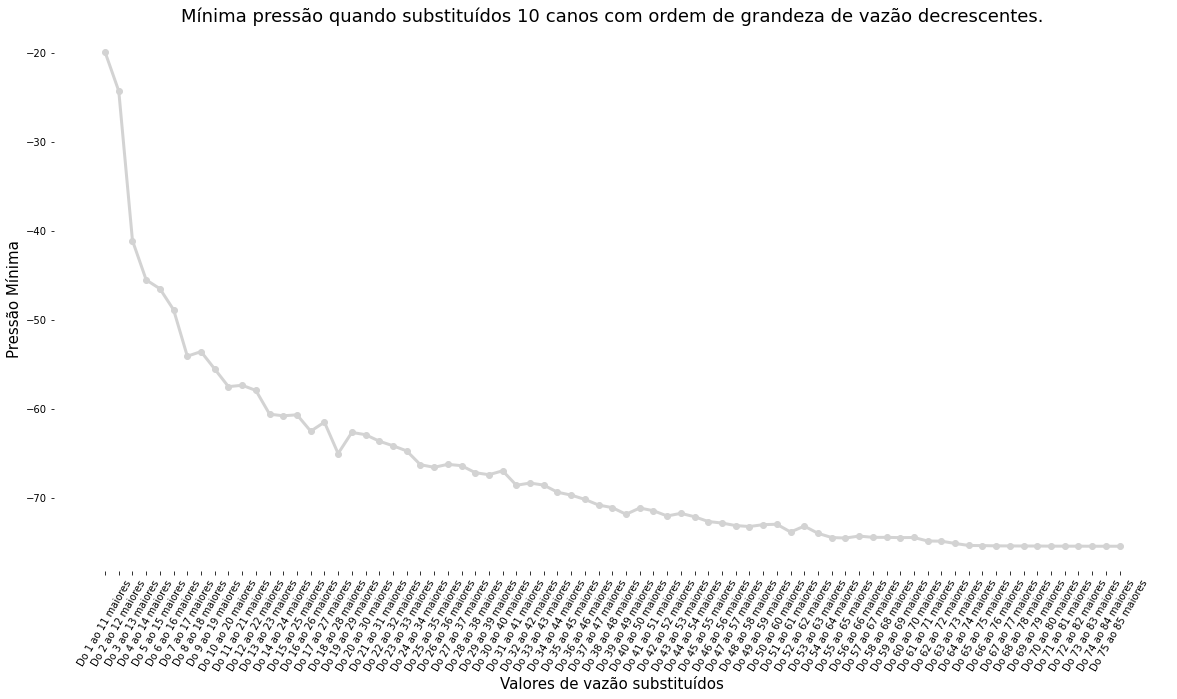

In [94]:
abd_10 = analiseFinalOrdenada(10, 5, 10)

In [95]:
abd_10[1:]

array([[40., 45., 50., 55., 60., 65.,  0., 70.,  1.,  2.],
       [ 0.,  1., 42., 40., 47., 45., 52., 50., 57., 55.],
       [45., 50., 55.,  1., 60., 65., 42., 70., 47., 52.],
       [ 1., 50., 55., 46.,  4., 60., 51., 65., 41., 56.],
       [50., 41.,  5., 47., 55., 52., 60., 65., 57., 70.],
       [46.,  4., 50., 55., 51., 56., 50., 17., 60., 62.],
       [41.,  1.,  2., 55., 60.,  4., 43., 47., 48., 51.],
       [ 4., 51., 41., 55., 60., 65., 47., 56., 70., 61.],
       [51., 50., 56.,  2., 60., 65.,  5., 47., 52., 61.],
       [ 5., 46., 56., 52., 61.,  9.,  2., 65., 70., 55.],
       [55., 60.,  2., 65., 47., 52., 51., 70., 56., 42.],
       [ 2., 56., 52., 61., 66., 43., 48., 71., 53., 47.],
       [56., 47.,  2., 60., 65., 61., 43., 53., 48., 52.],
       [47.,  2., 57., 60., 65., 56., 43., 62., 67., 48.],
       [52., 56., 60.,  9., 51., 42., 66., 71., 62.,  2.],
       [60., 65., 57., 62.,  6.,  2., 56., 67., 49., 54.],
       [57., 61.,  6., 53., 66., 47., 10., 62.,  8., 71.

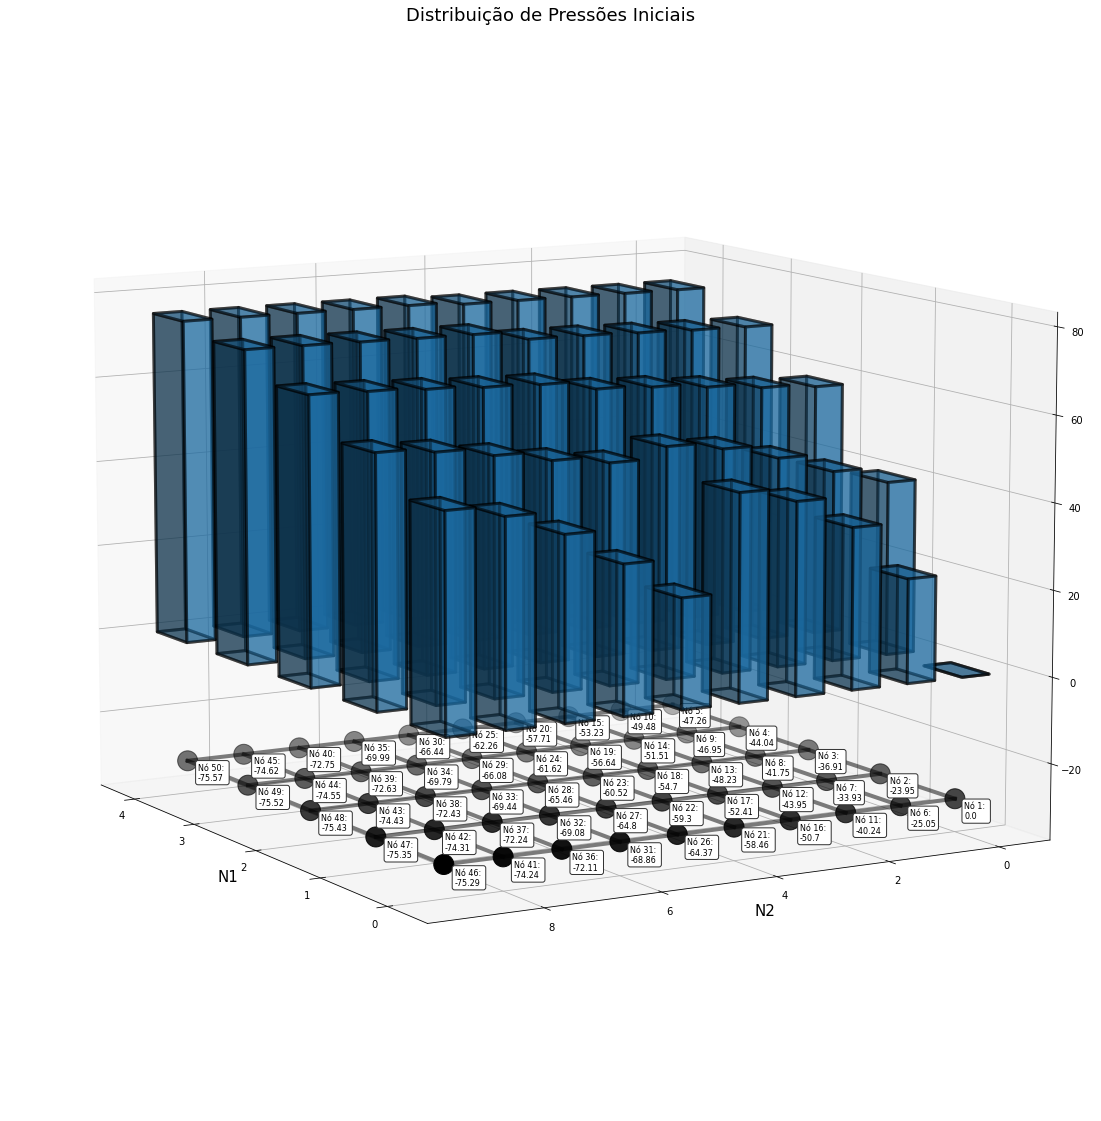

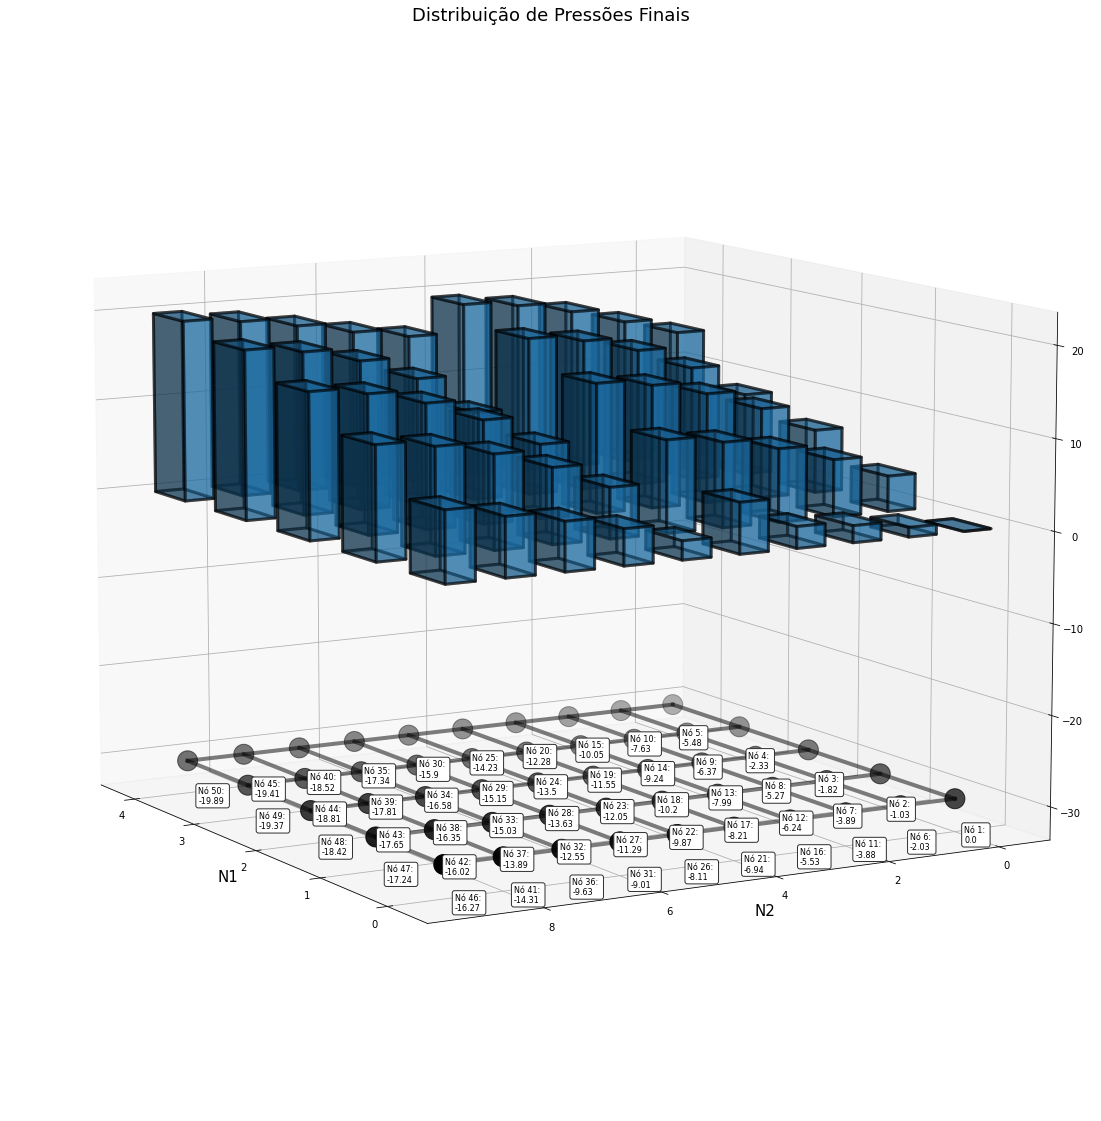

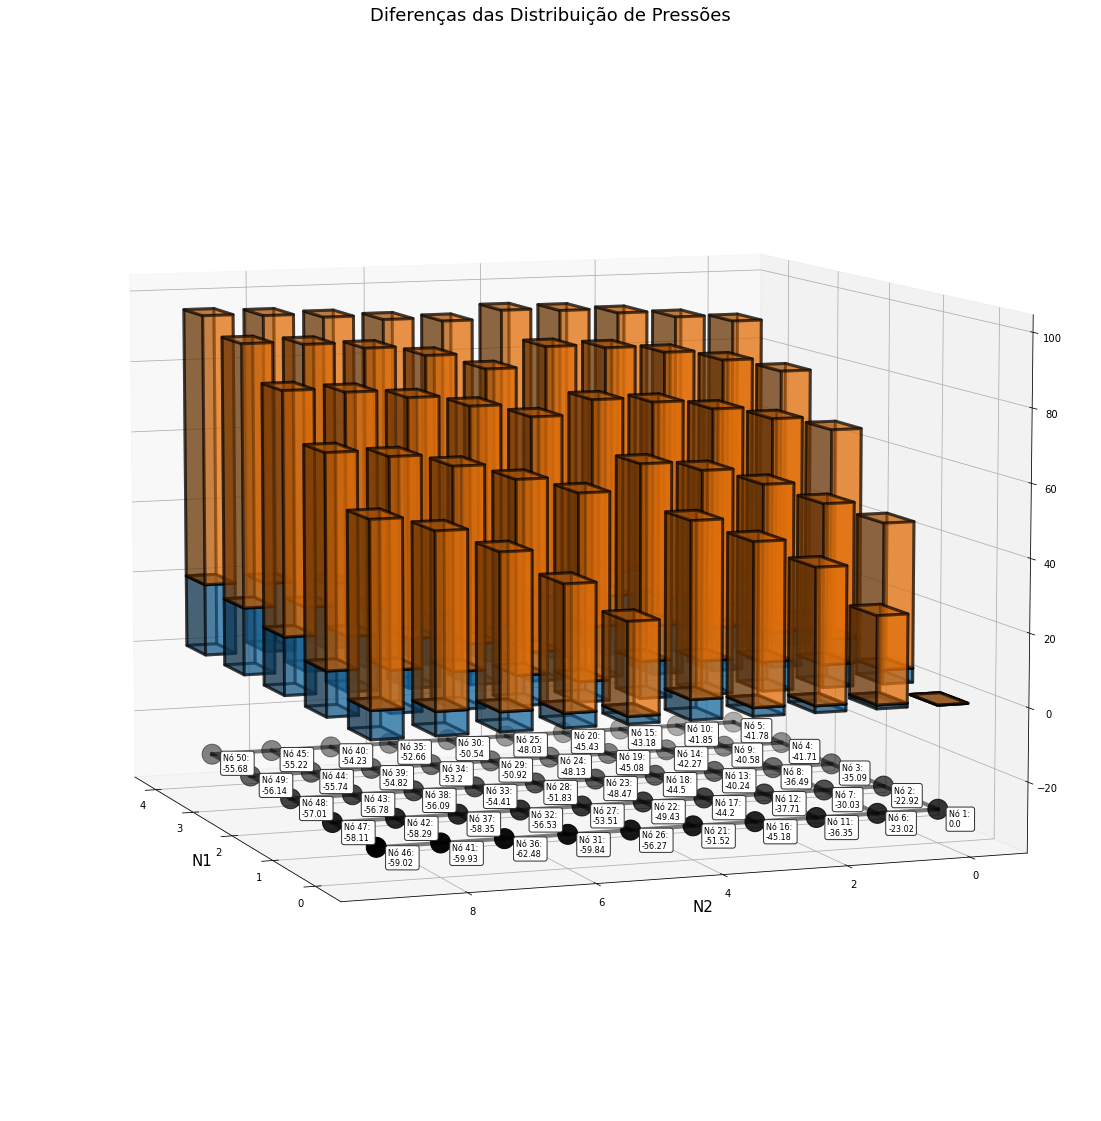

In [96]:
plot3D(10, 5, 0, 10)

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>A abordagem com 20 canos substiuídos:</h3>
</div>

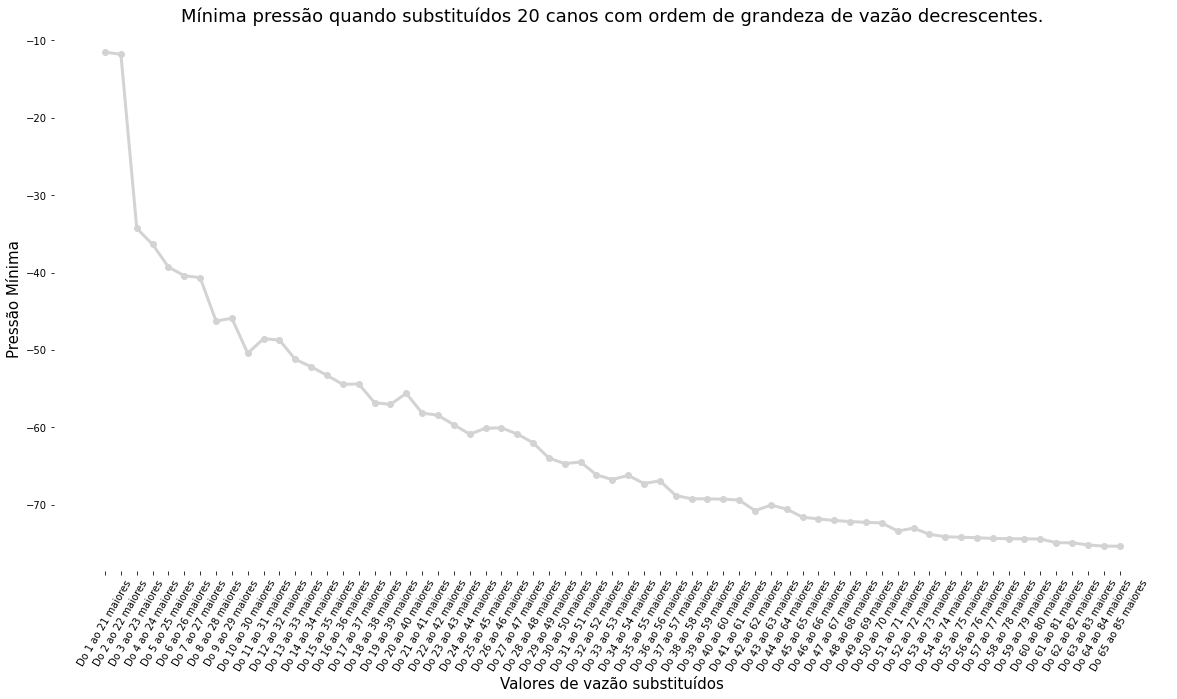

In [98]:
abd_20 = analiseFinalOrdenada(10, 5, 20)

In [100]:
abd_20[1:]

array([[40., 45., 50., ..., 73., 32., 41.],
       [ 0.,  1., 42., ..., 21., 82.,  3.],
       [45., 50., 55., ..., 33.,  3., 44.],
       ...,
       [84., 83., 21., ..., 34., 35., 35.],
       [16., 19., 21., ..., 35., 37., 38.],
       [21., 22., 20., ..., 37., 38., 36.]])

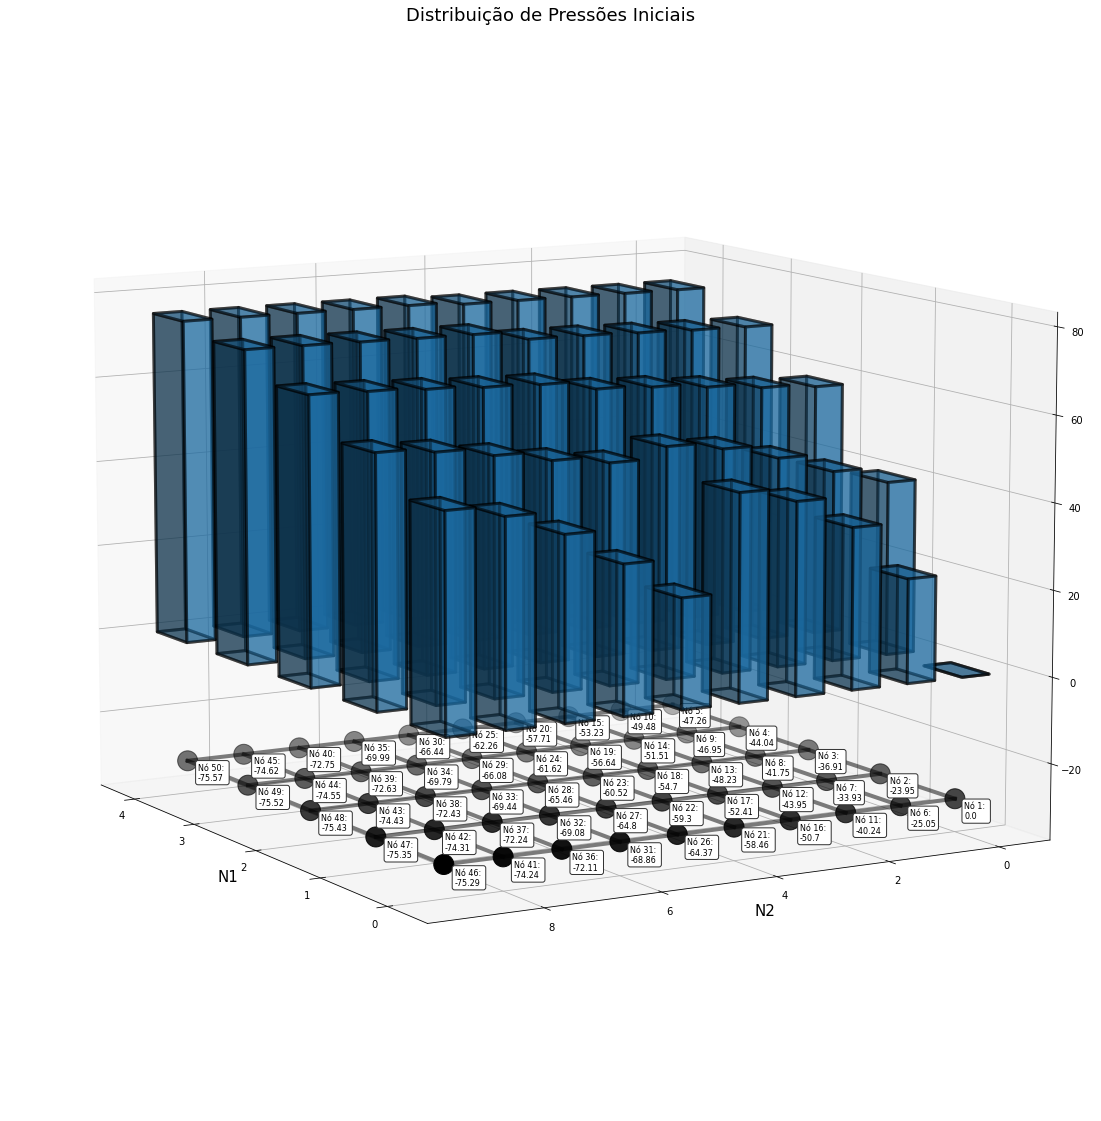

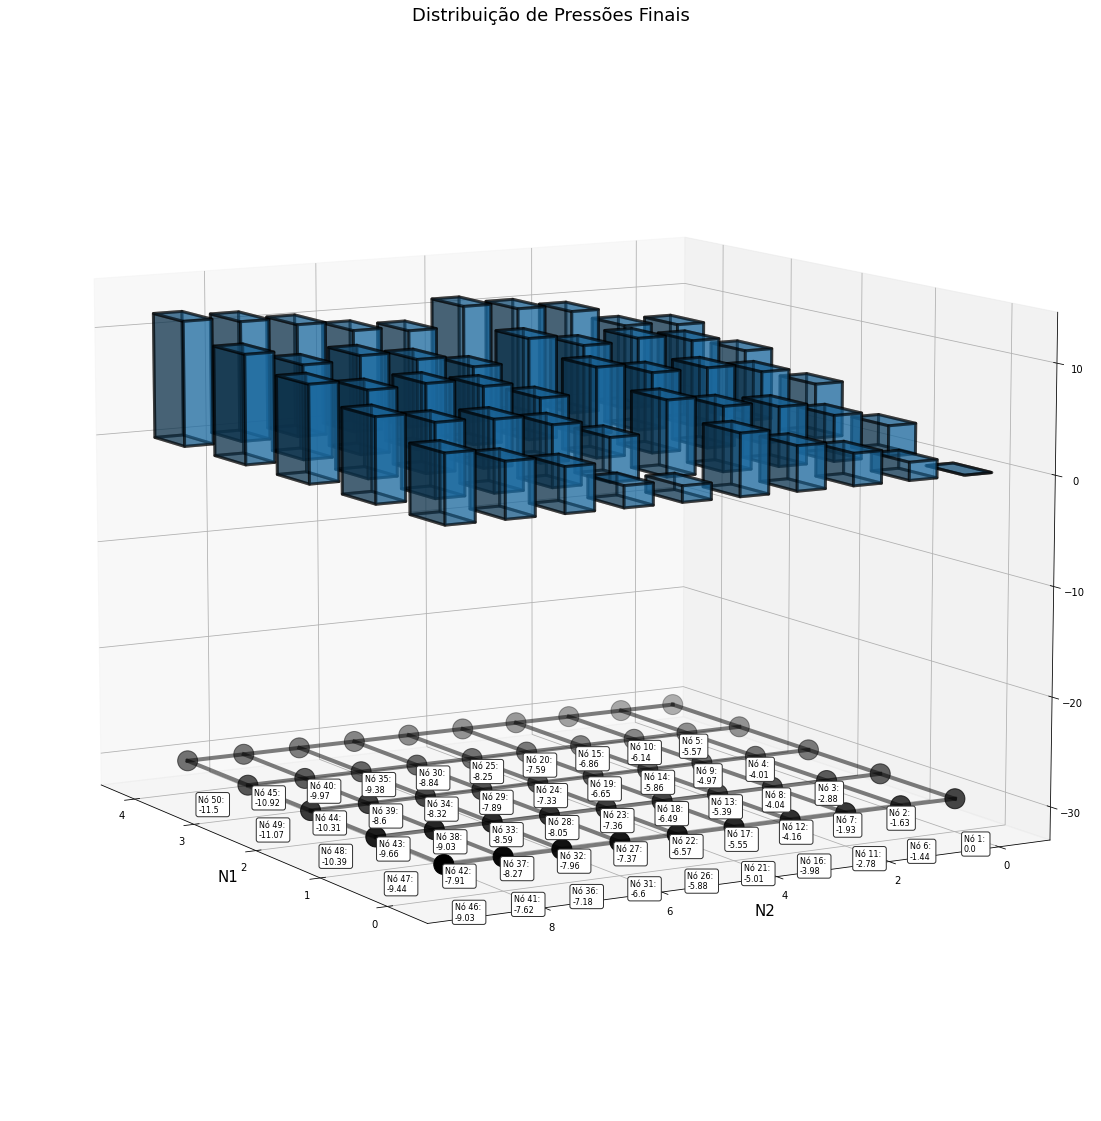

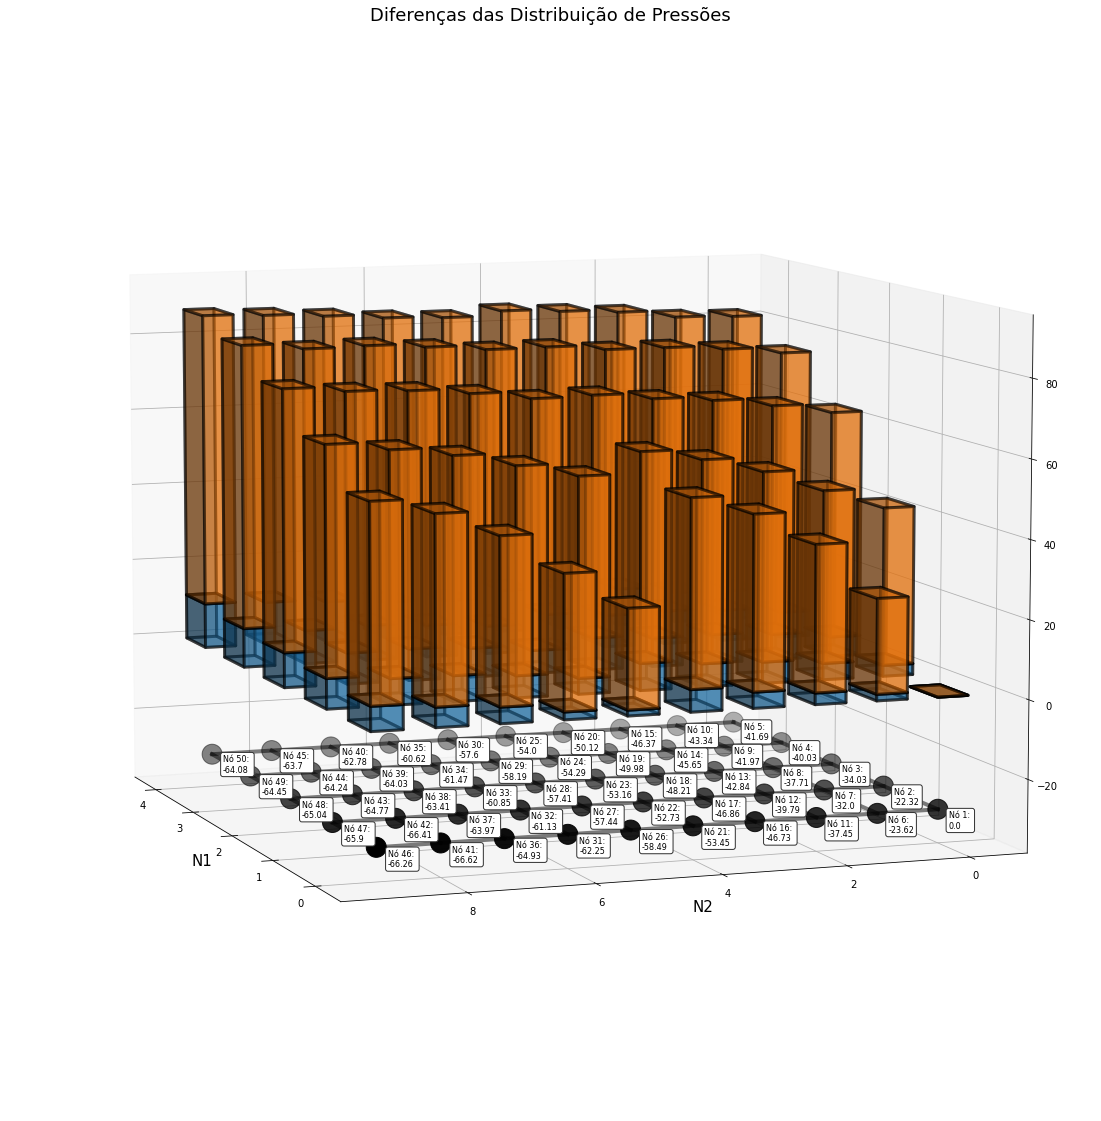

In [101]:
plot3D(10, 5, 0, 20)

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>A abordagem com 30 canos substiuídos:</h3>
</div>

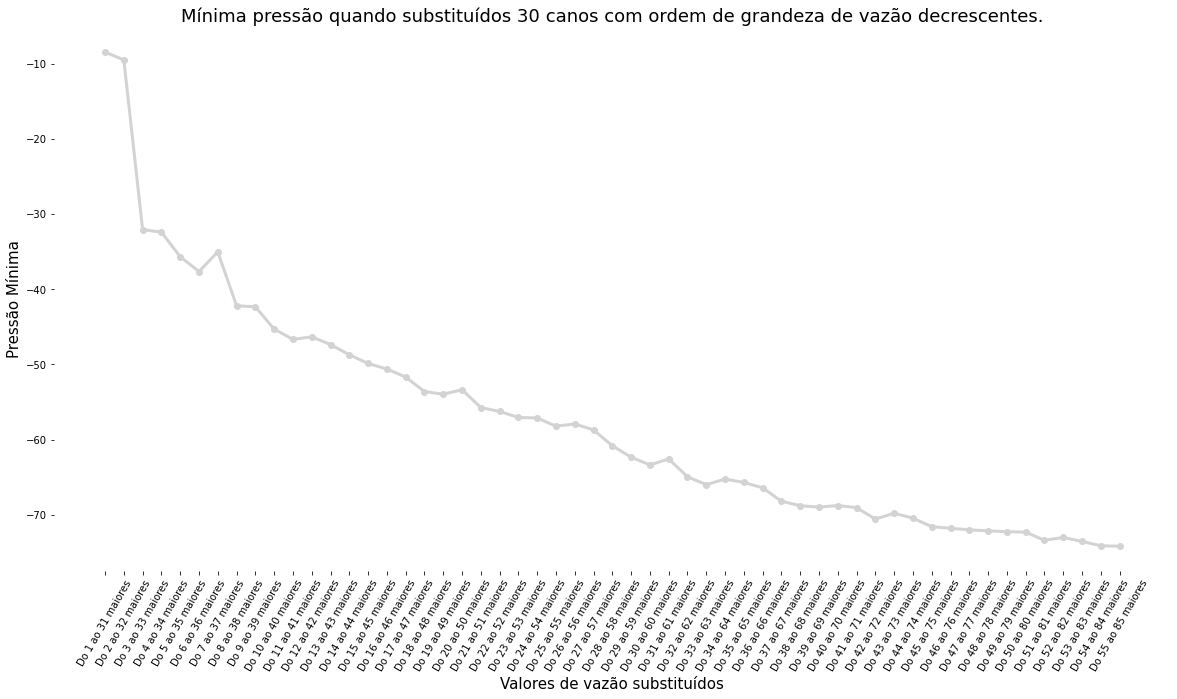

In [103]:
abd_30 = analiseFinalOrdenada(10, 5, 30)

In [104]:
abd_30[1:]

array([[40., 45., 50., ...,  4.,  5.,  6.],
       [ 0.,  1., 42., ..., 22., 38.,  4.],
       [45., 50., 55., ..., 73., 61., 66.],
       ...,
       [79., 12., 78., ..., 32., 35., 33.],
       [11., 12., 17., ..., 35., 37., 38.],
       [12., 17., 18., ..., 37., 38., 36.]])

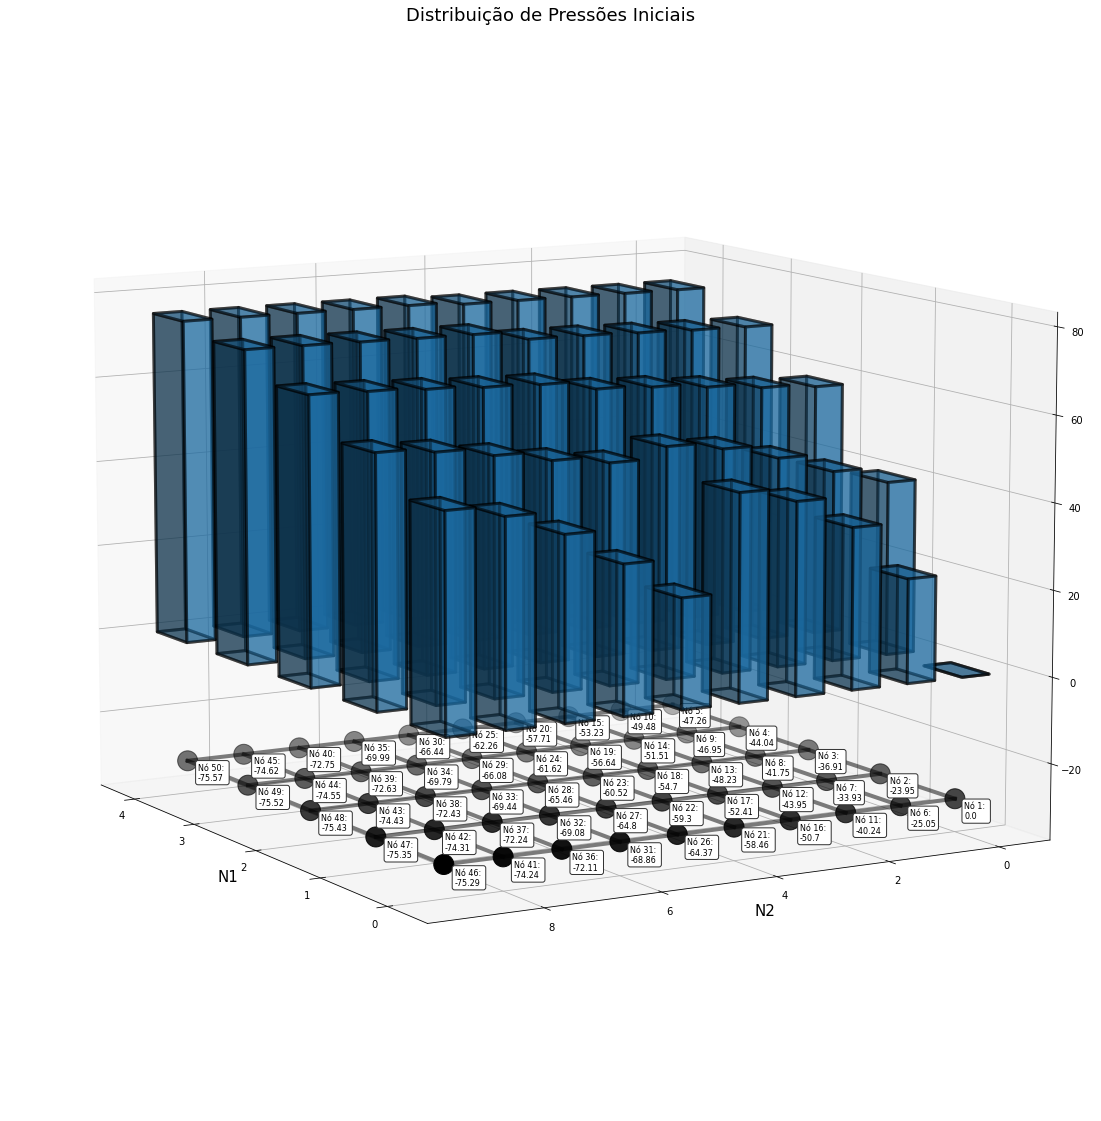

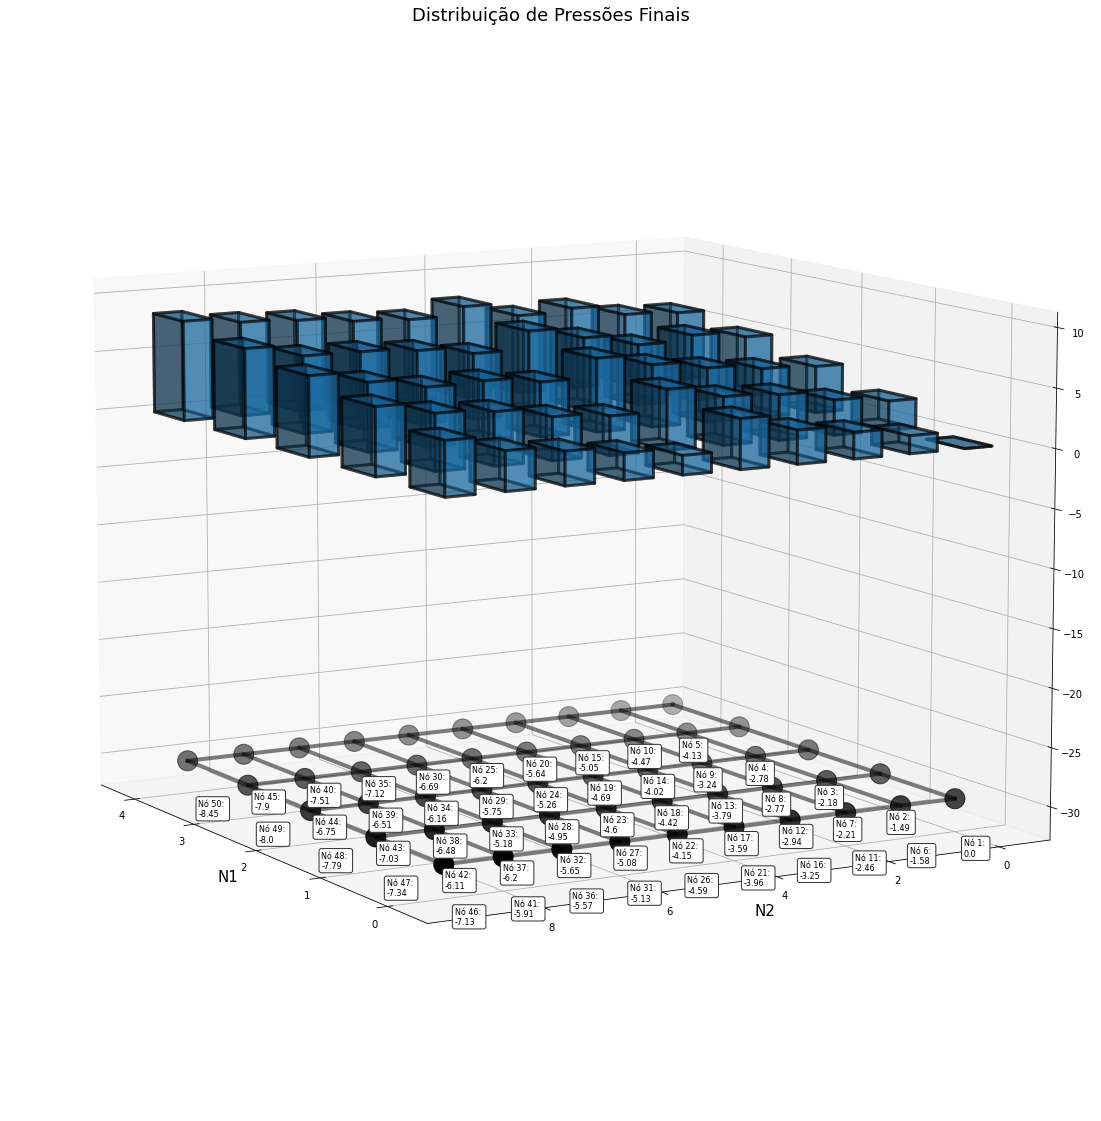

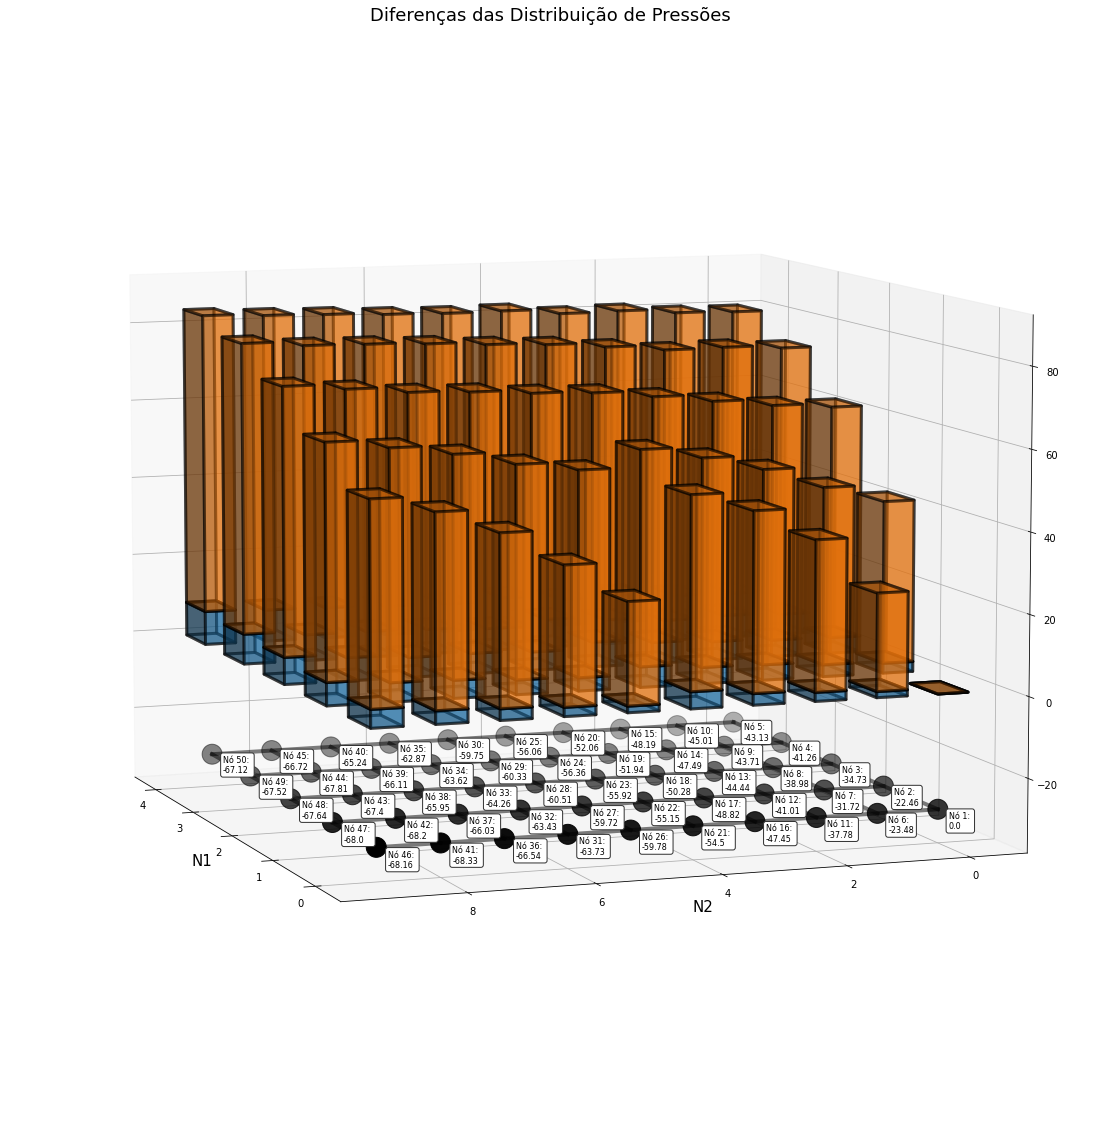

In [105]:
plot3D(10, 5, 0, 30)

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>A abordagem:</h3>
    
<p>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp O resultado obtido condiz com o que se esperava. A fim de se complementar a análise também foi feito um algorítimo de substituição aleatória dos canos para confirmar o padrão observado, buscando, a partir da força bruta algum resultado que tornaria inválida a hipótese inicial.
</div>

In [124]:
import random

def analiseAleatoria(N1, N2, num, x_maiores):
    tot_arestas = (N1 * (N2 - 1)) + (N2 * (N1 - 1))
    
    index = list()
    q_fim_min = list()
    q_fim_min_index = list()
    
    for i in range(num):
        mat_dia = geraMatrizDiagonal(N1, N2)
        index = np.random.randint(0, tot_arestas, (x_maiores))
        
        for aresta in index:
            mat_dia = alteraDiagonal(mat_dia, aresta)
        
        _, q_fim = resolveProblema(N1, N2, mat_dia)
        
        q_fim_min_index.append("Amostra " + str(i + 1)) 
        q_fim_min.append(q_fim.min())
        
    df_q_fim_min = pd.DataFrame(data = q_fim_min, index = q_fim_min_index)
    
    plt.figure(figsize = (20, 10))
    
    plt.title("Mínima pressão quando substituídos " + str(x_maiores) + " canos aleatoriamente.",
              fontsize = 18)
    plt.xlabel("Valores de vazão substituídos", fontsize = 15)
    plt.ylabel("Pressão Mínima", fontsize = 15)
    
    plot = plt.plot(df_q_fim_min, 'o-', color = 'lightgrey', linewidth = 3)
    plt.plot(float(df_q_fim_min.max()) * np.ones((df_q_fim_min.shape[0])), 
             '--', color = 'navy', linewidth = 3, alpha = 0.5)
    
    plt.text(df_q_fim_min.shape[0] / 2, df_q_fim_min.max(), "Pressão Máxima: " + str(float(df_q_fim_min.max())),
                        size = 12, bbox=dict(boxstyle="round",
                                    ec=(0.2, 0.2, 0.2),
                                    fc=(1.0, 1.0, 1.0),
                                             )
             )
    
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        
    for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(60)
            
    plt.gca().set_xticks([])
    
    plt.show()

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>A abordagem com 10 canos substiuídos aleatoriamente:</h3>
</div>

/var/folders/xc/pt5c14vd1ylgywb_0q1bml0r0000gn/T/ipykernel_48306/2100539420.py:48: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.gca().set_xticks([])


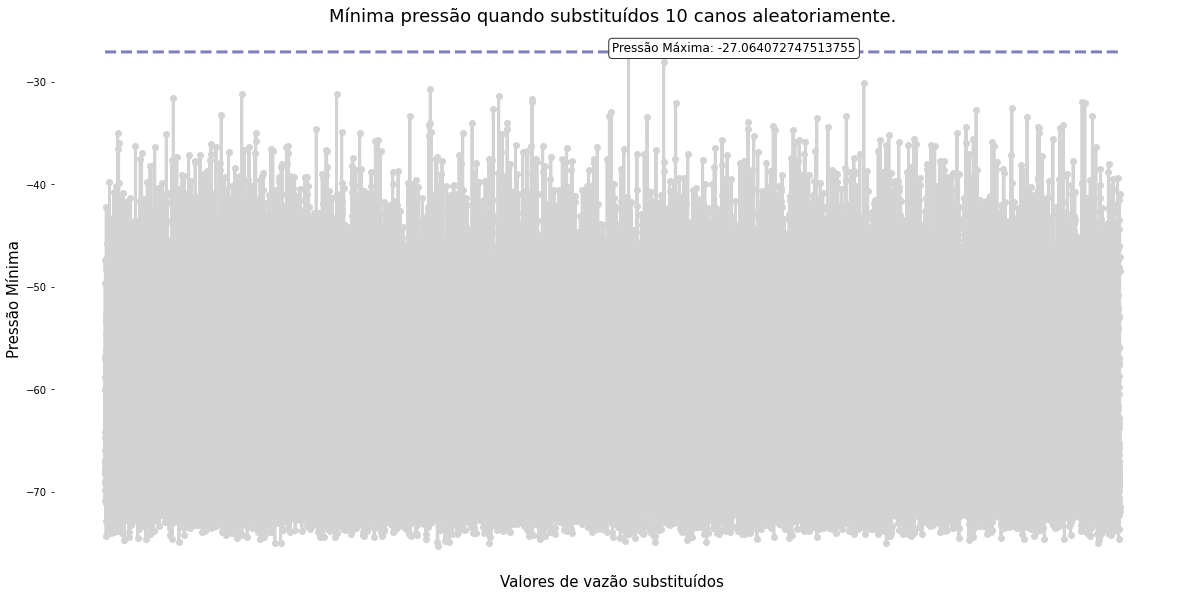

In [128]:
analiseAleatoria(10, 5, 50000, 10)

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>A abordagem com 20 canos substiuídos aleatoriamente:</h3>
</div>

/var/folders/xc/pt5c14vd1ylgywb_0q1bml0r0000gn/T/ipykernel_48306/2100539420.py:48: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.gca().set_xticks([])


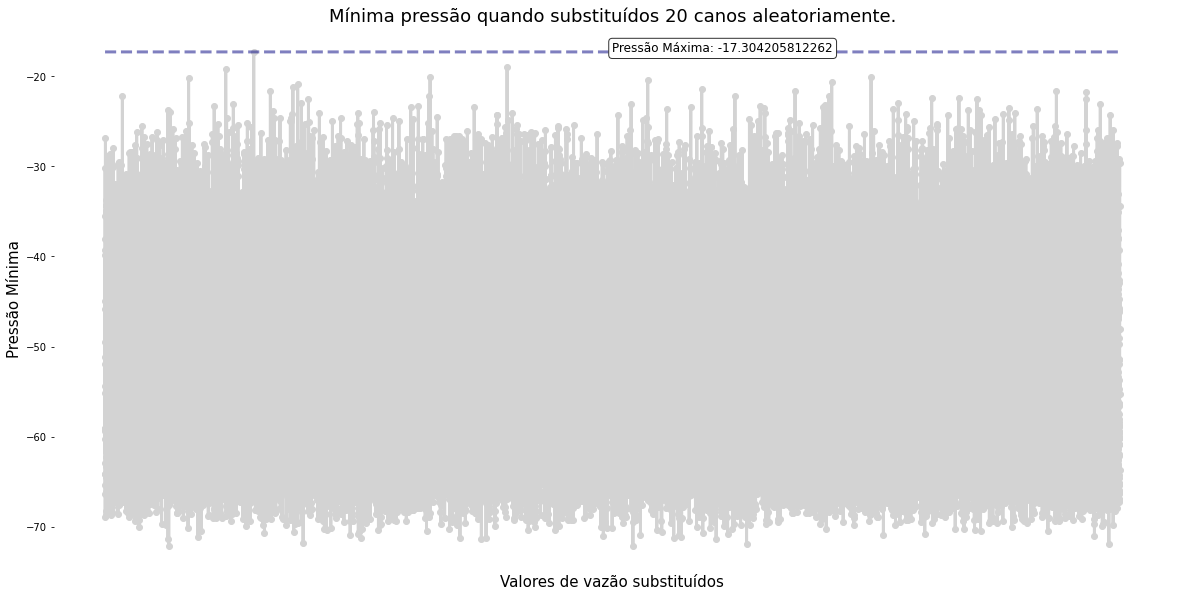

In [129]:
analiseAleatoria(10, 5, 50000, 20)

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>A abordagem com 30 canos substiuídos aleatoriamente:</h3>
</div>

/var/folders/xc/pt5c14vd1ylgywb_0q1bml0r0000gn/T/ipykernel_48306/2100539420.py:48: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.gca().set_xticks([])


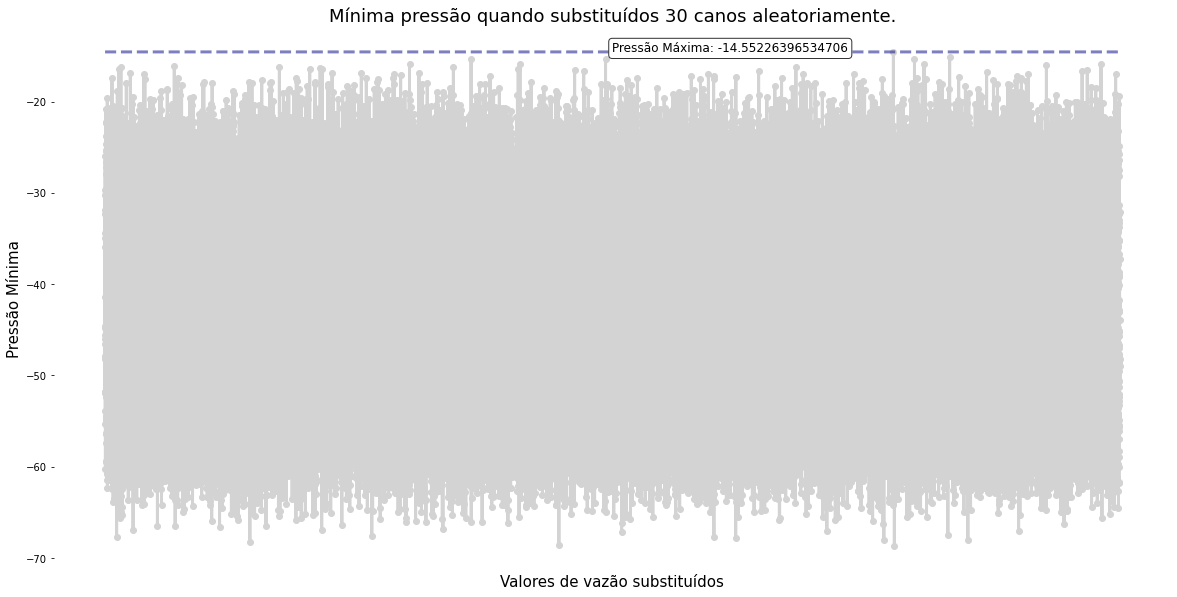

In [130]:
analiseAleatoria(10, 5, 50000, 30)

<hr>

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;">
    <h3>Conclusão:</h3>
    
<p>
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp Os testes acima condizem com o esperado uma vez que não ultrapassam as pressões mínimas obtidas pela lógica estipulada na abordagem do problema. Sendo assim concluiu-se que os canos a serem substituidos são:
</p>
</div>

In [111]:
print("Para o caso de 10 canos: ", abd_10[1], "\n"
      "\nPara o caso de 20 canos: \n", abd_20[1], "\n"
      "\nPara o caso de 30 canos: \n", abd_30[1])

Para o caso de 10 canos:  [40. 45. 50. 55. 60. 65.  0. 70.  1.  2.] 

Para o caso de 20 canos: 
 [40. 45. 50. 55. 60. 65.  0. 70.  1.  2. 75. 43. 48. 53. 58. 63. 68. 73.
 32. 41.] 

Para o caso de 30 canos: 
 [40. 45. 50. 55. 60. 65.  0. 70.  1.  2. 75. 43. 48. 53. 58. 63. 68. 73.
 32. 41. 46. 51. 56. 17. 62. 78. 67.  4.  5.  6.]


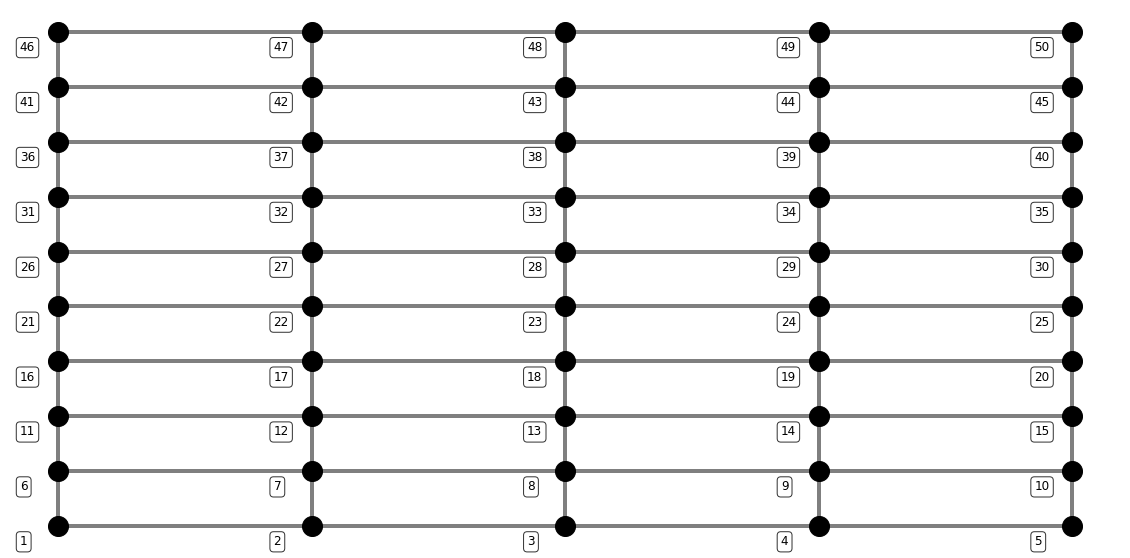

In [112]:
fazGrafo(10, 5)

<hr>